In [164]:
import pandas as pd
import json

data_for_analysis = pd.DataFrame()

with open('tags_data.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        df = pd.json_normalize(data)
        data_for_analysis = pd.concat([data_for_analysis,df], sort = False, axis = 0)
        


In [171]:
import datetime as dt

# # data_for_analysis['date'] = data_for_analysis['date'].apply(dt.datetime.fromtimestamp)

# data_for_analysis['date'] = pd.to_datetime(data_for_analysis['date'], format="%d/%m/%Y" )

def get_date_only(dt):
  return dt.date()

data_for_analysis['date'] = pd.to_datetime(data_for_analysis['date'])
data_for_analysis['date'] = data_for_analysis['date'].apply(get_date_only)
df

,id,date,owner_id,from_id,post_type,text,attachments,is_favorite,short_text_rate,carousel_offset,...,reposts.count,views.count,donut.is_donut,marked_as_ads,geo.showmap,signer_id,copyright.id,copyright.link,copyright.type,copyright.name
0,16533,1647395637,17135637,17135637,post,"В аду сегодня жарко, как говорили классики, а ...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,0.8,0.0,...,0,68,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,1647351203,-211181120,-211181120,post,❗️Русские войска стирают Изюм с лица земли и р...,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,0.8,0.0,...,0,13,False,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,133,1647340380,-211180476,-211180476,post,🧐 Выбрали ключевые тезисы из заявлений российс...,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,0.8,NaN,...,0,16,False,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,132,1647338640,-211180476,-211180476,post,Зачем Китаю Тайвань?\n\nПараллельно с боевыми ...,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,0.8,NaN,...,0,24,False,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2146,1647318021,16459738,16459738,post,Невероятно. Во время новостного выпуска на рос...,"[{'type': 'link', 'link': {'url': 'https://you...",False,0.8,NaN,...,0,162,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,19730,1589013877,179042302,179042302,post,🤗 С ВЕЛИКОЙ ПОБЕДОЙ ВСЕХ НАС\n⠀\nВо Второй Мир...,"[{'type': 'photo', 'photo': {'album_id': -7, '...",False,0.8,0.0,...,0,648,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,12013,1589006104,5146045,5146045,post,"Дорогие мои, поздравляю Вас с величайшим для н...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,0.8,NaN,...,1,1196,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,732,1589003893,16106191,16106191,post,"Мир и дружба всем нужны,\nМир важней всего на ...","[{'type': 'photo', 'photo': {'album_id': -7, '...",False,0.8,0.0,...,0,70,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,1871,1588997426,-70370381,-70370381,post,Нет в России семьи такой…\n\nДень Победы!\nСам...,"[{'type': 'video', 'video': {'access_key': '44...",False,0.8,NaN,...,0,63,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
data_for_analysis.id.drop_duplicates(keep='first', inplace=True)


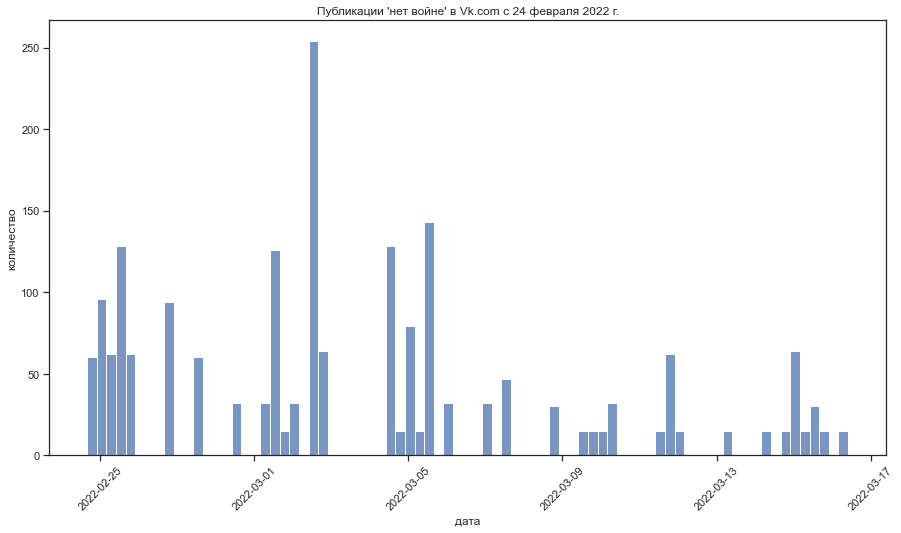

In [163]:

a = data_for_analysis.loc[(data_for_analysis.date > '2022-02-24')]
plt.figure(figsize=(15,8))
sns.histplot(a["date"], binwidth=0.25)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Публикации 'нет войне' в Vk.com c 24 февраля 2022 г.")
plt.xlabel("дата")
plt.ylabel("количество")

plt.show()